
# Project: Investigate a Dataset (Data Analysis on the TMDB Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>

In [21]:
movies = pd.read_csv("C:/Users/DELL/Downloads/tmdb-movies.csv")#Loading the dataset
movies.head()# The first five rows of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
movies.shape

(10866, 26)

This dataset contains 108666 rows and columns

In [32]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [5]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

## Checking for missing values

In [ ]:
movies.isna().sum()/len(movies)*100


id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
prod_comp_a              9.479109
prod_comp_b             41.137493
prod_comp_c             64.881281
prod_comp_d             81.106203
prod_comp_e             89.637401
dtype: float64

In [159]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,2.520261e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,9.659103e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,9.092453e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


### Data Cleaning

In [145]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'prod_comp_a', 'prod_comp_b', 'prod_comp_c',
       'prod_comp_d', 'prod_comp_e', 'Profit', 'genre_a', 'genre_b', 'genre_c',
       'genre_d', 'genre_e'],
      dtype='object')

> Checking for the names of all the columns.


>So From the dataset, we can see that there is a budget and a revenue column, 
To determine the profits made by the movie. A profit column will be generated.The revenue wiil be subtracted from the budget of each movie.

In [88]:
movies['Profit'] = movies['revenue']- movies['budget']

## Cleaning the *genres* column

In [ ]:
movies['genres'].unique()

>We have multiple genre mixed together in the genres column, so we are going to be seperating them using the str.split() method

In [144]:
movies[['genre_a', 'genre_b', 'genre_c', 'genre_d','genre_e']] = movies['genres'].str.split('|', expand=True)


## Cleaning the *production_companies* column

In [22]:
movies['production_companies'].unique()

array(['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
       ...,
       'Cherokee Productions|Joel Productions|Douglas & Lewis Productions',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

> We have multiple production companies but we want to separate each of them so as to individually identify the major production companies.

> To seperate the companies we will b using str.split() method

In [141]:
movies[['prod_comp_a', 'prod_comp_b', 'prod_comp_c', 'prod_comp_d','prod_comp_e']] = movies['production_companies'].str.split('|', expand=True,)

### Checking for Missing values and duplicated rows

In [ ]:
movies.isna().sum()/len(movies)*100

> As you can see, we have multiple missing value and we will take care of them after droppin our duplicated rows!

>To drop the duplicated rows, we used the drop_duplicates option

In [30]:
movies.drop_duplicates(keep = 'first',ignore_index = True,inplace=True)

In [126]:
movies.fillna('Unknown',inplace=True)

In [31]:
movies.shape

(10865, 26)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the names of the top ten grossing movies ever?)

In [58]:
top_ten = movies[['revenue', 'original_title', 'release_year']]

In [154]:
top_ten_gross = top_ten.sort_values(['revenue'],ascending =False)
top_ten_gross.reset_index(drop=True, inplace=True)
top_count=top_ten_gross.head(10)
top_count

,revenue,original_title,release_year
0,2781505847,Avatar,2009
1,2068178225,Star Wars: The Force Awakens,2015
2,1845034188,Titanic,1997
3,1519557910,The Avengers,2012
4,1513528810,Jurassic World,2015
5,1506249360,Furious 7,2015
6,1405035767,Avengers: Age of Ultron,2015
7,1327817822,Harry Potter and the Deathly Hallows: Part 2,2011
8,1274219009,Frozen,2013
9,1215439994,Iron Man 3,2013


> Our first question is to determine the top ten grossed movies ever as provided in the dataset. first we isolated the required columns and sorted the values based on the revenue to determine the top 10 grossing movies of all time as of the date of the dataset.

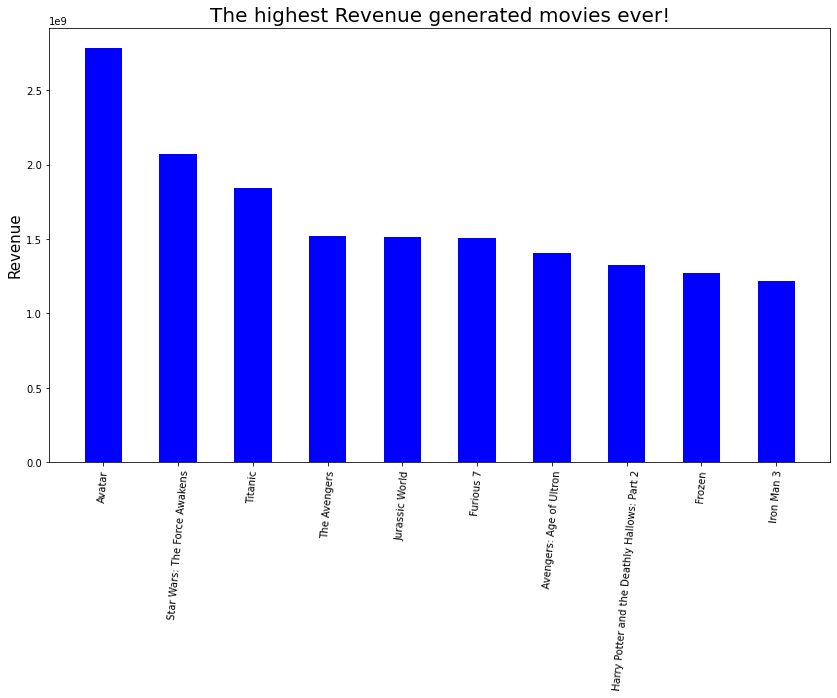

In [86]:
fig = plt.figure(figsize=(14,8))
plt.bar(top_count['original_title'],top_count['revenue'], width =0.5, color = 'Blue')
plt.ylabel('Revenue',size=15,)
plt.xticks(rotation=85)


plt.title('The highest Revenue generated movies ever!',size=20)
plt.show()

> The movie **Avatar** is the highest grossed movies ever! generating **2781505847 dollars** in revenue followed by **Star Wars: The Force Awaken** which generated **$2068178225 dollars** down to **Iron Man 3** which is in tenth place of the top grossed movies ever!!

### Research Questions(What movies had the biggest budgets what did they generate and how big was their profit?)

In [160]:
budgets = movies[[ 'original_title', 'release_year', 'budget','revenue','Profit']]
top_budget = budgets.sort_values(['budget'],ascending =False)
top_budget.reset_index(drop=True, inplace=True)
tp=top_budget.head(10)
tp

,original_title,release_year,budget,revenue,Profit
0,The Warrior's Way,2010,425000000,11087569,-413912431
1,Pirates of the Caribbean: On Stranger Tides,2011,380000000,1021683000,641683000
2,Pirates of the Caribbean: At World's End,2007,300000000,961000000,661000000
3,Avengers: Age of Ultron,2015,280000000,1405035767,1125035767
4,Superman Returns,2006,270000000,391081192,121081192
5,John Carter,2012,260000000,284139100,24139100
6,Tangled,2010,260000000,591794936,331794936
7,Spider-Man 3,2007,258000000,890871626,632871626
8,The Lone Ranger,2013,255000000,89289910,-165710090
9,The Hobbit: An Unexpected Journey,2012,250000000,1017003568,767003568


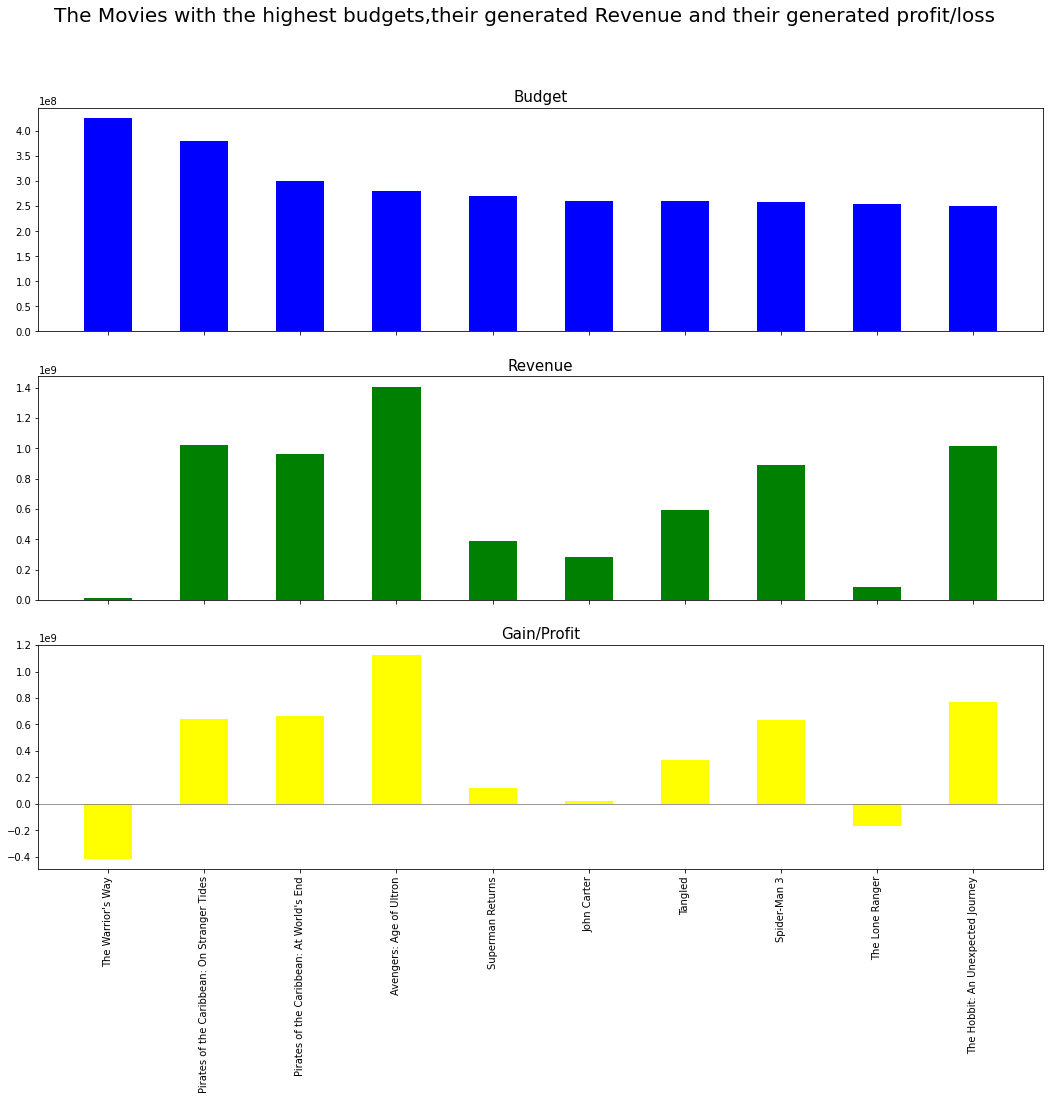

In [158]:

fig, ax = plt.subplots(3,figsize=(18,14),sharex=True)
a=ax[0].bar(tp['original_title'],tp['budget'],color='blue',width =0.5)
b=ax[1].bar(tp['original_title'],tp['revenue'],color='green',width =0.5)
c=ax[2].bar(tp['original_title'],tp['Profit'],color='yellow',width =0.5);

# set chart titles
ax[2].axhline(0, color='grey', linewidth=0.8)
ax[0].set_title('Budget',size=15)
ax[1].set_title('Revenue',size=15)
ax[2].set_title('Gain/Profit',size=15)
plt.xticks(rotation=90)
plt.suptitle('The Movies with the highest budgets,their generated Revenue and their generated profit/loss',size=20)
plt.show()

> The movie **The Warrior's Way**  had a budget of 
**425000000 dollars** but had 
a huge loss of **-413912431 dollars**
and the movie **The Lone Ranger** had a budget of 
**255000000 dollars** loss, but made a huge
**$-165710090 dollars**
This is a massive loss for both movies as alot of money was put into the making of the movie. this concludes that not all movies with a huge budget will make profits in the box office!


In [119]:
highest_loss = budgets.sort_values(['Profit'],ascending =True)
highest_loss.reset_index(drop=True, inplace=True)
hl=highest_loss.head(10)
hl

,original_title,release_year,budget,revenue,Profit
0,The Warrior's Way,2010,425000000,11087569,-413912431
1,The Lone Ranger,2013,255000000,89289910,-165710090
2,The Wolfman,2010,150000000,0,-150000000
3,The Pacific,2010,120000000,0,-120000000
4,The Alamo,2004,145000000,25819961,-119180039
5,Mars Needs Moms,2011,150000000,38992758,-111007242
6,Double Wedding,2010,104002432,0,-104002432
7,Dragonball Evolution,2009,100000000,0,-100000000
8,Brother Bear,2003,100000000,250,-99999750
9,The 13th Warrior,1999,160000000,61698899,-98301101


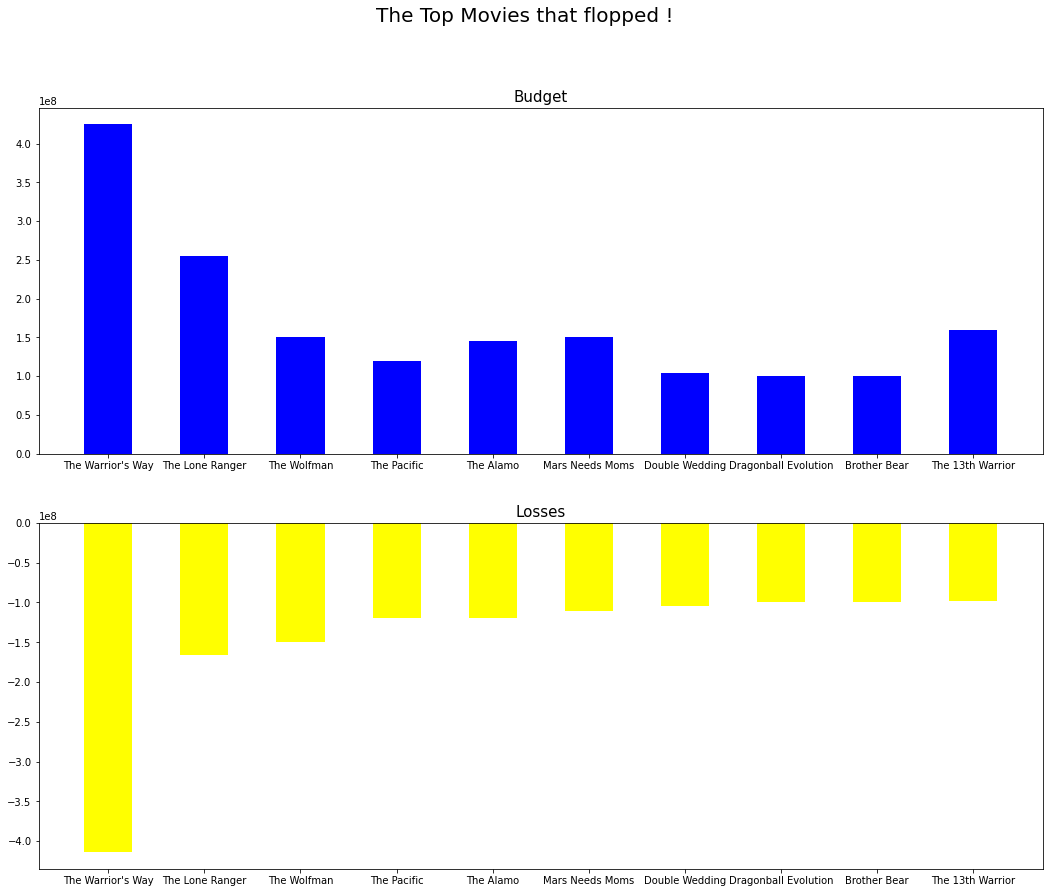

In [125]:

fig, ax = plt.subplots(2,figsize=(18,14))
a=ax[0].bar(hl['original_title'],hl['budget'],color='blue',width =0.5)
c=ax[1].bar(hl['original_title'],hl['Profit'],color='yellow',width =0.5);

# set chart titles
a
ax[0].set_title('Budget',size=15)
ax[1].set_title('Losses',size=15)

plt.suptitle('The Top Movies that flopped !',size=20)
plt.show()

>The movie **The Warrior's Way**  had a budget of 
**425000000 dollars** but had 
a huge loss of **-413912431 dollars**
and the movie **The Lone Ranger** had a budget of 
**255000000 dollars** but made a huge loss
**$-165710090 dollars**.  We focus on the movies that made huge 
losses only.

### Research Question 3  (What are the names of the Directors based on the most popular movies?)

In [127]:
pop = movies[['original_title', 'release_year','popularity', 'budget','revenue','Profit', 'director', 'runtime', 'prod_comp_a']]

In [130]:
most_pop = pop.sort_values(['popularity'],ascending =False)
most_pop.reset_index(drop=True, inplace=True)
mp=most_pop.head(10)
mp

,original_title,release_year,popularity,budget,revenue,Profit,director,runtime,prod_comp_a
0,Jurassic World,2015,32.985763,150000000,1513528810,1363528810,Colin Trevorrow,124,Universal Studios
1,Mad Max: Fury Road,2015,28.419936,150000000,378436354,228436354,George Miller,120,Village Roadshow Pictures
2,Interstellar,2014,24.949134,165000000,621752480,456752480,Christopher Nolan,169,Paramount Pictures
3,Guardians of the Galaxy,2014,14.311205,170000000,773312399,603312399,James Gunn,121,Marvel Studios
4,Insurgent,2015,13.112507,110000000,295238201,185238201,Robert Schwentke,119,Summit Entertainment
5,Captain America: The Winter Soldier,2014,12.971027,170000000,714766572,544766572,Joe Russo|Anthony Russo,136,Marvel Studios
6,Star Wars,1977,12.037933,11000000,775398007,764398007,George Lucas,121,Lucasfilm
7,John Wick,2014,11.422751,20000000,78739897,58739897,Chad Stahelski|David Leitch,101,Thunder Road Pictures
8,Star Wars: The Force Awakens,2015,11.173104,200000000,2068178225,1868178225,J.J. Abrams,136,Lucasfilm
9,The Hunger Games: Mockingjay - Part 1,2014,10.739009,125000000,752100229,627100229,Francis Lawrence,123,Lionsgate


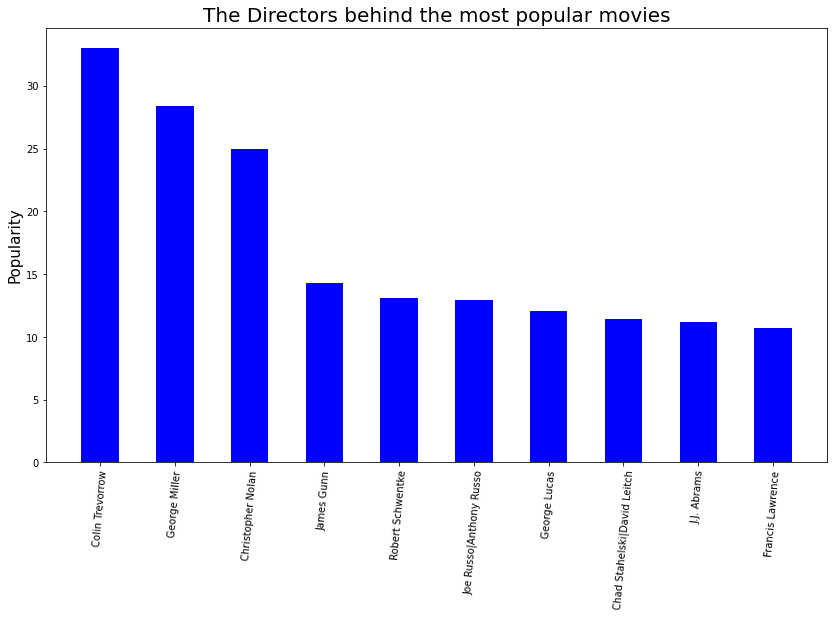

In [132]:
fig = plt.figure(figsize=(14,8))
plt.bar(mp['director'],mp['popularity'], width =0.5, color = 'Blue')
plt.ylabel('Popularity',size=15,)
plt.xticks(rotation=85)


plt.title('The Directors behind the most popular movies',size=20)
plt.show()

>  **Colin Trevorrow** is the director of **Jurassic World**,the most popular movie based on the popularity column, the next director is **George Miller** of the
**Interstellar** in **2nd place**. In third place is **Christopher Nolan** of the movie **Guardians of the Galaxy**


### Research Question 4  (What are the names of the movies with longest runtime? how does it relate to its bugdet??)

In [134]:
run_time = pop.sort_values(['runtime'],ascending =False)
run_time.reset_index(drop=True, inplace=True)
rt=run_time.head(10)
rt

,original_title,release_year,popularity,budget,revenue,Profit,director,runtime,prod_comp_a
0,The Story of Film: An Odyssey,2011,0.006925,0,0,0,Mark Cousins,900,Unknown
1,Taken,2002,0.469332,0,0,0,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,DreamWorks
2,Band of Brothers,2001,0.537593,0,125000000,125000000,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,HBO
3,Shoah,1985,0.147489,0,0,0,Claude Lanzmann,566,British Broadcasting Corporation (BBC)
4,"North and South, Book I",1985,0.000065,0,0,0,Unknown,561,Unknown
5,Planet Earth,2006,0.137913,0,0,0,Alastair Fothergill,550,Unknown
6,The Pacific,2010,0.757082,120000000,0,-120000000,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,Playtone
7,John Adams,2008,0.136540,0,0,0,Tom Hooper,501,Unknown
8,Life,2009,0.102223,0,0,0,Martha Holmes|Simon Blakeney|Stephen Lyle,500,British Broadcasting Corporation (BBC)
9,Generation Kill,2008,0.336308,0,0,0,Susanna White|Simon Cellan Jones,470,Company Pictures


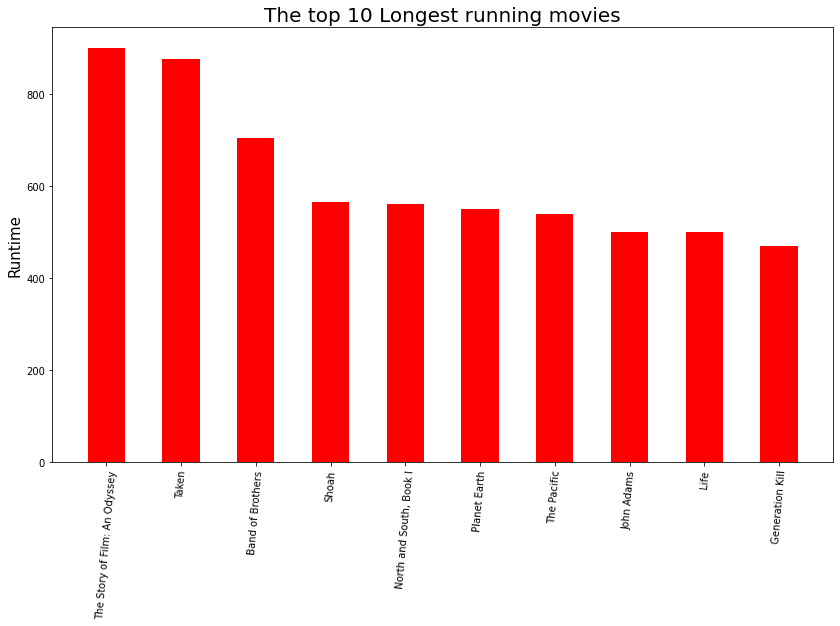

In [136]:
fig = plt.figure(figsize=(14,8))
plt.bar(rt['original_title'],rt['runtime'], width =0.5, color = 'Red')
plt.ylabel('Runtime',size=15,)
plt.xticks(rotation=85)


plt.title('The top 10 Longest running movies',size=20)
plt.show()

>The movie with the longest runtime is **The Story of Film: An Odyssey** with a runtime of **900 minutes**  The profit, revenue and budget are unknown.

### Research Question 5  (What are the names of the most profitable genre??)

In [146]:
genre=movies[['original_title','genre_a','Profit',  'prod_comp_a']]

In [148]:
gen= genre.sort_values(['Profit'],ascending =False)
gen.reset_index(drop=True, inplace=True)
gn=gen.head(10)
gn

,original_title,genre_a,Profit,prod_comp_a
0,Avatar,Action,2544505847,Ingenious Film Partners
1,Star Wars: The Force Awakens,Action,1868178225,Lucasfilm
2,Titanic,Drama,1645034188,Paramount Pictures
3,Jurassic World,Action,1363528810,Universal Studios
4,Furious 7,Action,1316249360,Universal Pictures
5,The Avengers,Science Fiction,1299557910,Marvel Studios
6,Harry Potter and the Deathly Hallows: Part 2,Adventure,1202817822,Warner Bros.
7,Avengers: Age of Ultron,Action,1125035767,Marvel Studios
8,Frozen,Animation,1124219009,Walt Disney Pictures
9,The Net,Crime,1084279658,Columbia Pictures


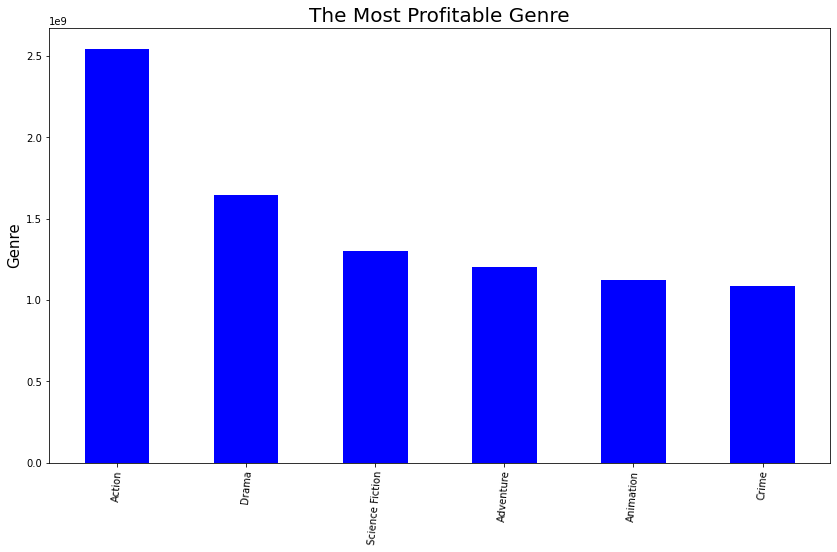

In [149]:
fig = plt.figure(figsize=(14,8))
plt.bar(gn['genre_a'],gn['Profit'], width =0.5, color = 'Blue')
plt.ylabel('Genre',size=15,)
plt.xticks(rotation=85)


plt.title('The Most Profitable Genre',size=20)
plt.show()

> The **Action genre** is the most profitable genre.

### Research Question 6  (What are the names of the Production Company with the top gains?)

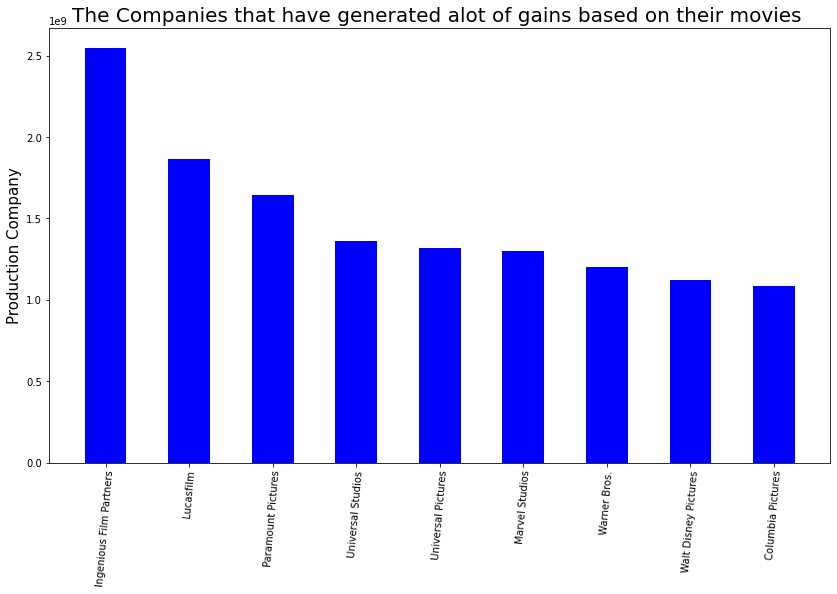

In [151]:
fig = plt.figure(figsize=(14,8))
plt.bar(gn['prod_comp_a'],gn['Profit'], width =0.5, color = 'Blue')
plt.ylabel('Production Company',size=15,)
plt.xticks(rotation=85)


plt.title('The Companies that have generated alot of gains based on their movies ',size=20)
plt.show()

>**Ingenious Film Partners** is one of the production companies to have generated the highest revenue ever!. **Marvel Studios** has also been able to generate alot of profit twice.

## Conclusion
>Alot of movies has been made over the years with different genres. From our analysis, we can conlude that its not about the budget of the movie but people's interest in movies differs! despite the budget!!. The 
As an investor, It will be better to invest in the **Action genre** as it has proven to be the most profitable to invest in.
Production companies such as **Lucasfilms**, **Walt Disney Pictures** especially  **Marvel Studios** are notable companies to be considered as great investment plans